In [1]:
# load and summarize
import pandas as pd
import matplotlib.pyplot as plt
#load dataset
data = pd.read_csv('eighthr.data', header=None, index_col=0, parse_dates=True, squeeze=True)
print(data.shape)
counts = data.groupby(73).size()
#summarize class counts
for i in range (len(counts)):
    percent = counts[i] / data.shape[0]*100
    print('Class=%d, total=%d, percenrage=%.3f' %(i, counts[i], percent))

(2534, 73)
Class=0, total=2374, percenrage=93.686
Class=1, total=160, percenrage=6.314


In [2]:
counts = data.groupby(73).size()
counts[1]


160

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0.0


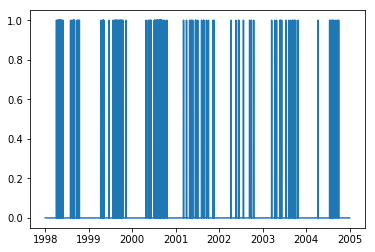

In [5]:
plt.plot(data.index, data.values[:,-1])
plt.show()

In [6]:
# DATA PREPARATION
from pandas import read_csv
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack
from numpy import savetxt

values = data.values
# frame as supervised learning
values[values=='?']=0.0

supervised = list()
for i in range(len(values)-1):
    X, y = values[i, :-1], values[i+1, -1]
    row = hstack((X,y))
    supervised.append(row)
supervised = array(supervised)
#split into train-test
split = 365*2
train, test = supervised[:-split,:], supervised[-split:,:]
train, test = train.astype('float32'), test.astype('float32')
print(train.shape, test.shape)
# save prepared datasets
savetxt('train.csv', train, delimiter=',')
savetxt('test.csv', test, delimiter=',')

(1803, 73) (730, 73)


In [7]:
# NAIVE PREDICTION METHOD
from sklearn.metrics import brier_score_loss
from numpy import loadtxt

#load datsets
train = loadtxt('train.csv', delimiter=',')
test = loadtxt('test.csv', delimiter=',')
#estimate naive probabilistic forecast
naive = sum(train[:,-1]) / train.shape[0]
print(naive)
#forecast the test dataset
yhat = [naive for _ in range(len(test))]
# evaluate forecast
testy = test[:,-1]
bs = brier_score_loss(testy, yhat)
print('Brier Score: %.6f' % bs)
# calculate brier skill score
bs_ref = bs
bss = (bs - bs_ref)/(0 - bs_ref)
print('Brier Skill Score: %.6f' % bss)

0.07265668330560178
Brier Score: 0.039232
Brier Skill Score: -0.000000


In [ ]:
scores, names = list(), list()
n_trees = 100
#bagging
model = BaggingClassifier(n_estimat)

><class 'sklearn.ensemble.bagging.BaggingClassifier'>, bss=0.065814
><class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, bss=0.106689
><class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, bss=0.118517
><class 'sklearn.ensemble.forest.RandomForestClassifier'>, bss=0.105533


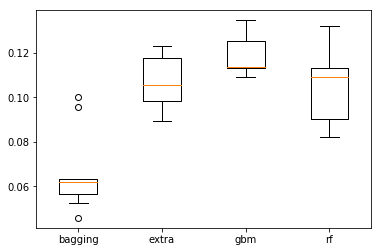

In [10]:
# evaluate ensemble tree methods
from numpy import loadtxt
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.metrics import brier_score_loss
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# evaluate the model
def evaluate_once(bs_ref, template, trainX, trainy, testX, testy):
    #fit model
    model = clone(template)
    model.fit(trainX, trainy)
    # predict probabilities for 0 and 1
    probs = model.predict_proba(testX)
    #keep the probabilities for class=1 only
    yhat = probs[:,1]
    #calculate brier score
    bs = brier_score_loss(testy, yhat)
    #calculate brier skill score
    bss = (bs - bs_ref)/(0 - bs_ref)
    return bss

# evaluate an sklearn model n times
def evaluate(bs_ref, model, trainX, trainy, testX, testy, n=10):
    scores = [evaluate_once(bs_ref, model, trainX, trainy, testX, testy) for _ in range(n)]
    print('>%s, bss=%.6f' % (type(model), mean(scores)))
    return scores

#load datasets
train = loadtxt('train.csv', delimiter=',')
test = loadtxt('test.csv', delimiter=',')
# split into inputs/outputs
trainX, trainy, testX, testy = train[:,:-1], train[:,-1], test[:,:-1], test[:,-1]
# estimate naive probabilistic forecast
naive = sum(train[:,-1])/ train.shape[0]
# forecast the test dataset
yhat = [naive for _ in range(len(test))]
# calculate brier score loss
bs_ref = brier_score_loss(testy, yhat)
# evaluate a suite of ensemble tree methods
scores, names = list(), list()
n_trees=100

#bagging
model = BaggingClassifier(n_estimators=n_trees)
avg_bss = evaluate(bs_ref, model, trainX, trainy, testX, testy)
scores.append(avg_bss)
names.append('bagging')
# extra
model = ExtraTreesClassifier(n_estimators=n_trees)
avg_bss = evaluate(bs_ref, model, trainX, trainy, testX, testy)
scores.append(avg_bss)
names.append('extra')
#gbm
model = GradientBoostingClassifier(n_estimators=n_trees)
avg_bss = evaluate(bs_ref, model, trainX, trainy, testX, testy)
scores.append(avg_bss)
names.append('gbm')
#rf
model = RandomForestClassifier(n_estimators=n_trees)
avg_bss = evaluate(bs_ref, model, trainX, trainy, testX, testy)
scores.append(avg_bss)
names.append('rf')

#plot results
plt.boxplot(scores, labels=names)
plt.show()

><class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, bss=0.124120
><class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, bss=0.145364
><class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, bss=0.080109
><class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, bss=0.196157


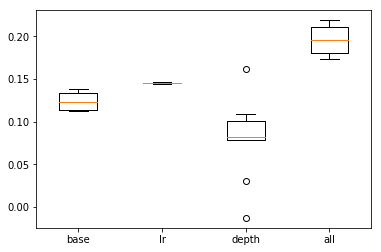

In [12]:
# PARAMETER TUNING GRADIENT BOOSTING
#base
scores, names = list(), list()
model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,max_depth=3)
avg_bss = evaluate(bs_ref, model, trainX, trainy, testX, testy)
scores.append(avg_bss)
names.append('base')
# learning rate
model = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500,subsample=1.0,max_depth=3)
avg_bss = evaluate(bs_ref, model, trainX, trainy, testX, testy)
scores.append(avg_bss)
names.append('lr')
#depth
model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=0.7,max_depth=7)
avg_bss = evaluate(bs_ref, model, trainX, trainy, testX, testy)
scores.append(avg_bss)
names.append('depth')
#all
model = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500,subsample=0.7,max_depth=7)
avg_bss = evaluate(bs_ref, model, trainX, trainy, testX, testy)
scores.append(avg_bss)
names.append('all')

#plot results
plt.boxplot(scores, labels=names)
plt.show()